In [34]:
import numpy as np
import pandas as pd

dataFrame = pd.read_csv('world.csv')
dataFrame.dtypes

ID                  int64
iso_code           object
洲名                 object
國家                 object
日期                 object
總確診數                int64
新增確診數               int64
七天移動平均新增確診數       float64
總死亡數                int64
新增死亡數               int64
七天移動平均新增死亡數       float64
每百萬人確診數           float64
每百萬人死亡數           float64
傳染率               float64
新增檢驗件數              int64
總檢驗件數               int64
每千人檢驗件數           float64
七天移動平均新增檢驗件數      float64
陽性率               float64
每確診案例相對檢驗數量       float64
疫苗總接種總劑數            int64
疫苗總接種人數             int64
疫苗新增接種劑數            int64
七天移動平均疫苗新增接種劑數    float64
每百人接種疫苗劑數         float64
每百人接種疫苗人數         float64
疫情控管指數            float64
總人口數                int64
中位數年紀             float64
70歲以上人口比例         float64
平均壽命              float64
解除隔離數               int64
解封指數              float64
dtype: object

In [35]:
dataFrame.shape

(187885, 33)

In [36]:
dataFrame = dataFrame.reindex(columns=['洲名','國家','日期','總確診數','新增確診數','新增死亡數','總人口數'])
dataFrame.tail(20)

,洲名,國家,日期,總確診數,新增確診數,新增死亡數,總人口數
187865,非洲,辛巴威,2022-06-17,254753,251,7,15092171
187866,非洲,辛巴威,2022-06-18,254753,0,0,15092171
187867,非洲,辛巴威,2022-06-19,254801,48,1,15092171
187868,非洲,辛巴威,2022-06-20,254831,30,0,15092171
187869,非洲,辛巴威,2022-06-21,254919,88,2,15092171
187870,非洲,辛巴威,2022-06-22,255049,130,5,15092171
187871,非洲,辛巴威,2022-06-23,255136,87,1,15092171
187872,非洲,辛巴威,2022-06-24,255309,173,7,15092171
187873,非洲,辛巴威,2022-06-25,255309,0,0,15092171
187874,非洲,辛巴威,2022-06-26,255355,46,0,15092171


In [37]:
tw_covid19 = dataFrame[dataFrame['國家'] == "台灣"]
tw_covid19

,洲名,國家,日期,總確診數,新增確診數,新增死亡數,總人口數
163986,亞洲,台灣,2020-01-16,0,0,0,23855008
163987,亞洲,台灣,2020-01-17,0,0,0,23855008
163988,亞洲,台灣,2020-01-18,0,0,0,23855008
163989,亞洲,台灣,2020-01-19,0,0,0,23855008
163990,亞洲,台灣,2020-01-20,0,0,0,23855008
...,...,...,...,...,...,...,...
164884,亞洲,台灣,2022-07-02,3837856,34807,96,23855008
164885,亞洲,台灣,2022-07-03,3870528,32672,88,23855008
164886,亞洲,台灣,2022-07-04,3893643,23115,69,23855008
164887,亞洲,台灣,2022-07-05,3929627,35984,103,23855008


In [45]:
tw1=tw_covid19[['日期','新增確診數','新增死亡數']].sort_values(by='日期',ascending=True)
tw2=tw1.set_index('日期').loc['2022-04-01':]
tw2

,新增確診數,新增死亡數
日期,,
2022-04-01,235,0
2022-04-02,404,0
2022-04-03,280,0
2022-04-04,275,0
2022-04-05,278,0
...,...,...
2022-07-02,34807,96
2022-07-03,32672,88
2022-07-04,23115,69


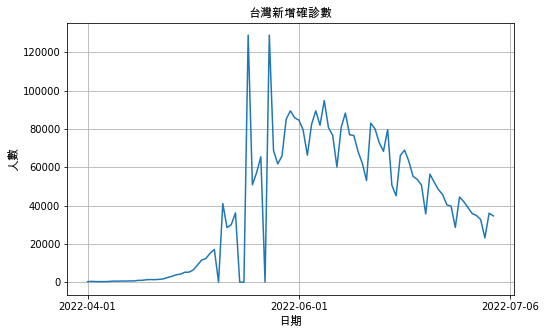

In [52]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font=FontProperties(fname='/Library/Fonts/Arial Unicode.ttf',size=12)

figure = plt.figure(figsize=(8,5))
ax1 = figure.add_subplot(1,1,1)
ax1.plot(tw2.index,tw2['新增確診數'])
plt.title("台灣新增確診數",fontproperties=font)
plt.xlabel("日期",fontproperties=font)
plt.ylabel("人數",fontproperties=font)
plt.xticks(ticks=[0,50,100],labels=['2022-04-01','2022-06-01','2022-07-06'])
plt.grid()